# OSM 2018 Computation
## Problem Set 3
### 07.10.2018 
### Yung-Hsu Tsui*
* I thank Jay-Hyung Kim for the precious comments.

### Exercise 1

In [1]:
# 1.1
import numpy as np
from scipy import linalg as la
def Mod_QR(A):
    m,n = A.shape
    Q = np.copy(A)
    R = np.zeros([n,n])
    for i in range(0,n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        for j in range(i+1, n):
            R[i,j] = np.dot(Q[:,j].T , Q[:,i])
            Q[:,j] = Q[:,j] - np.dot(R[i,j],Q[:,i])
            
    return Q,R

A = np.random.random((5,4))
Q,R = la.qr(A, mode="economic") # Use mode="economic" for reduced QR.
print(A.shape, Q.shape, R.shape)

a,b = Mod_QR(A)

(5, 4) (5, 4) (4, 4)


In [2]:
print(np.allclose(np.triu(b), b))
print(np.allclose(a.T @ a, np.identity(4)))
print(np.allclose(a @ b, A))

True
True
True


In [3]:
# 1.2
def det_calculate(A):
    m,n = A.shape
    if m != n:
         raise ValueError('The input matrix is not square!')
    Q,R = Mod_QR(A)
    R_diag = np.diag(R)
    return np.prod(R_diag)

A = np.random.random((4,4))
abs(det_calculate(A))  - abs(la.det(A))

-1.3877787807814457e-17

In [6]:
#1.3
def Linear_sys_solver(A,b):
    m,n1 = A.shape
    n2,k = b.shape
    if n1 != n2:
        raise ValueError('The number of columns of A should be equal to bs rows!')
    Q,R = Mod_QR(A)
    y = Q.T @ b
    x = la.inv(R)@ y
    return x


b = np.ones([4,1])
x = Linear_sys_solver(A,b)
x

array([[ 3.16531321],
       [ 0.78436178],
       [ 2.91968045],
       [-4.32048534]])

In [7]:
#1.4
def Householder(A):
    m,n = A.shape
    R = np.copy(A)
    Q = np.identity(m)
    for k in range(0,n-1):
        u = np.copy(R[k:,k])
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)
        u = u/la.norm(u)
        R[k:,k:] = R[k:,k:] - 2*np.outer(u , u.T@R[k:,k:])
        Q[k:,:] = Q[k:,:] - 2*np.outer(u , u.T@Q[k:,:])
        
    return Q.T, R

A = np.random.random((4, 3))
Q,R = Householder(A)

print(A.shape, Q.shape, R.shape)
np.allclose(Q @ R, A)

(4, 3) (4, 4) (4, 3)


True

In [10]:
# 1.5
def Hessenberg(A):
    m,n = A.shape
    H = np.copy(A)
    Q = np.identity(m)
    for k in range(0,n-2):
        u = np.copy(H[k+1:,k])
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)
        u = u/la.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2*np.outer(u , u.T@H[k+1:,k:])
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(H[:,k+1:]@u,u.T)
        Q[k+1:,:] = Q[k+1:,:] - 2*np.outer(u , u.T @ Q[k+1:,:])
        
    return H, Q.T


A= np.random.random((8,8))
H,Q= Hessenberg(A)
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(Q @ H @ Q.T, A))

True
True


### Exercise 2

In [11]:
#2.1
import numpy as np
from scipy import linalg as la

def Mod_QR(A):
    m,n = A.shape
    Q = np.copy(A)
    R = np.zeros([n,n])
    for i in range(0,n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        for j in range(i+1, n):
            R[i,j] = np.dot(Q[:,j].T , Q[:,i])
            Q[:,j] = Q[:,j] - np.dot(R[i,j],Q[:,i])
            
    return Q,R

def Linear_sys_solver(A,b):
    m,n1 = A.shape
    n2,k = b.shape
    if m != n2:
        raise ValueError('The number of columns of A should be equal to bs rows!')
    Q,R = Mod_QR(A)
    y = Q.T @ b
    x = la.solve_triangular(R,y)
    return x

A = np.random.random((4,4))
b = np.ones([4,1])
x = Linear_sys_solver(A,b)
x

array([[0.55766548],
       [0.16660709],
       [0.52330904],
       [0.36757059]])

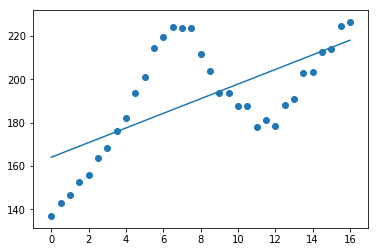

In [13]:
#2.2
import matplotlib.pyplot as plt
housing = np.load('housing.npy')

A = np.zeros([len(housing),2])
y = np.zeros([len(housing),1])
for i in range(len(housing)):
    A[i,0] = 1
    A[i,1] = housing[i,0]
    y[i] = housing[i,1]
    
coefficient = Linear_sys_solver(A,y)

plt.plot(A[:,1], coefficient[0] + coefficient[1]*A[:,1])
plt.scatter(A[:,1],y)
plt.show()

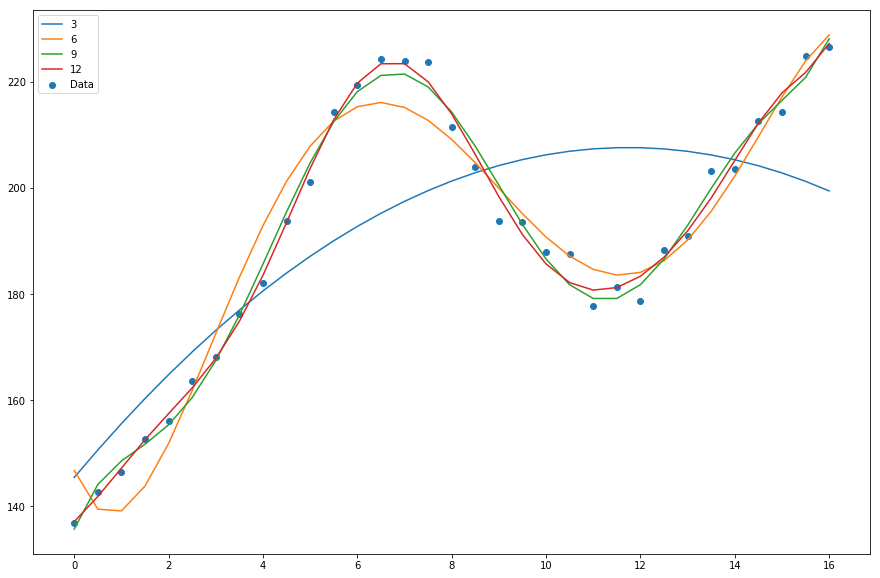

In [14]:
#2.3
fig, ax = plt.subplots(figsize = (15,10))

for j in range(1,5):
    A = np.zeros([len(housing),3*j+1])
    y = np.zeros([len(housing),1])
    for i in range(len(housing)):
        A[i,0] = 1
        for n in range(1,3*j):
            A[i,n] = housing[i,0]**n
                
        y[i] = housing[i,1]
        
    x = la.lstsq(A, y)
    Y_plot = 0
    for k in range(0,3*j): 
        Y_plot += x[0][k]*A[:,k] 
    plt.plot(housing[:,0], Y_plot,label= str(3*j) )

plt.scatter(A[:,1],y,label='Data')
ax.legend(loc='upper left')
plt.show()


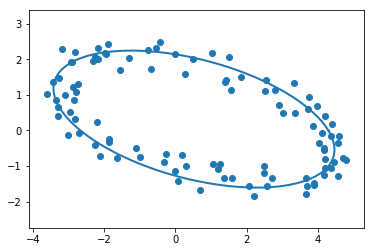

In [15]:
#2.4

ellipse = np.load('ellipse.npy')

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")
    
m = len(ellipse)

x = ellipse[:,0]
y = ellipse[:,1]

A = np.zeros([m,5])
b = np.ones([m,1])
for i in range(0,m):
    A[i,0] = x[i]**2
    A[i,1] = x[i]
    A[i,2] = x[i]*y[i]
    A[i,3] = y[i]
    A[i,4] = y[i]**2

coeff = la.lstsq(A, b)
plot_ellipse(coeff[0][0], coeff[0][1], coeff[0][2], coeff[0][3], coeff[0][4])
plt.scatter(x,y)
plt.show()

In [16]:
#2.5
import random as rd


def Power_Method(A,N=2000,tol = 10**(-8)):
    m,n = A.shape
    x0 = np.random.randn(n)
    x0 = x0/la.norm(x0)
    
    for k in range(1,N):
        x1 = A@x0
        x1 = x1/la.norm(x1)
        if la.norm(x0-x1) < tol:
            break
            
        x0 = x1
    print(la.norm(x0-x1))    
    return x1.T@(A@x1) ,x1

A = np.random.random((5,5)) + 4
eigs,vec =Power_Method(A,N=20000)
np.allclose(A @ vec, eigs * vec)

3.6578982658071173e-10


True

In [17]:
#2.6

def QR_Algorithm(A,N=10000, tol = 10**(-8)):
    import cmath
    
    m,n = A.shape
    S = la.hessenberg(A)
    for k in range(0,N):
        Q,R = la.qr(S)
        S = R@Q
    
    eigs = []
    i = 0
    while i < n:
        
        if (i < n-1 and abs(S[i+1,i]) < tol ) or (i == n-1):
            eigs.append(S[i,i])
        else:
            eig1 = (S[i,i]+S[i+1,i+1] + cmath.sqrt((S[i,i]+S[i+1,i+1])**2  - 4*(S[i,i+1]*S[i+1,i])) )/2
            eig2 = (S[i,i]+S[i+1,i+1] - cmath.sqrt((S[i,i]+S[i+1,i+1])**2  - 4*(S[i,i+1]*S[i+1,i])) )/2
            eigs.append(eig1)
            eigs.append(eig2)
            
            i = i+1
        i = i+1
    return eigs

A = np.random.random((5,5)) + 4
A = A.T + A
eigs12 = QR_Algorithm(A,N=10000)
print('The eigenvalues of the code are : ',eigs12)
print('The eigenvalues of the package code are',la.eig(A)[0])

The eigenvalues of the code are :  [44.29237953561837, 1.5668747609242186, -1.3008658606575314, -0.790136336924168, 0.6070056195433978]
The eigenvalues of the package code are [44.29237954+0.j  1.56687476+0.j  0.60700562+0.j -1.30086586+0.j
 -0.79013634+0.j]


### Exercise 3

In [18]:
# 3.1

import numpy as np
from scipy import linalg as la
import random
import matplotlib.pyplot as plt


def Compact_SVD(A):
    
    lamda, V = la.eig(A.conj().T @ A)
    sigma = np.sqrt(lamda)
    order = np.argsort(-sigma)
    sigma = sigma[order]
    V = V[order]
    r = sum(sigma != 0)
    sigma1 = sigma[:r]
    V1 = V[:,:r]
    U1 = A @ V1 / sigma1
    
    return U1, sigma1, V1.conj().T

A = np.random.rand(10,3)
U,s,Vh = Compact_SVD(A)
print(U.shape,s.shape,Vh.shape)

print(np.allclose(U.T @ U, np.identity(3)))
print(np.allclose(U @ np.diag(s) @ Vh, A))
print(np.linalg.matrix_rank(A) == len(s))

(10, 3) (3,) (3, 3)
True
True
True


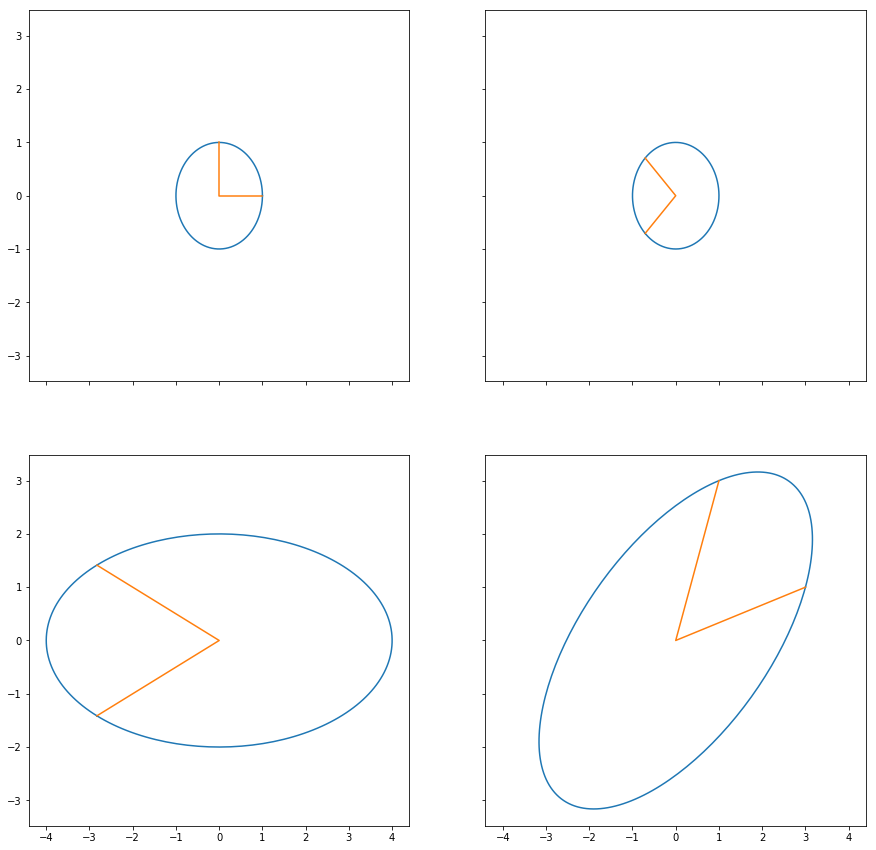

In [19]:
#3.2
def plot_circle(A):
    m,n = A.shape
    if (m!= 2) or (n!= 2):
        raise ValueError('The matrix is not 2 by 2!')
    
    u, s, vh = la.svd(A, full_matrices=True)
    
    x1 = np.cos(np.linspace(0,2*np.pi,200))
    y1 = np.sin(np.linspace(0,2*np.pi,200))
    S1 = np.vstack((x1,y1))
    E1 = np.array([[1, 0, 0],[0, 0, 1]])
    
    S2 = vh @ S1
    x2 = S2[0,:]
    y2 = S2[1,:]
    E2 = vh @ E1

    S3 = np.diag(s)@vh @ S1
    x3 = S3[0,:]
    y3 = S3[1,:]
    E3 = np.diag(s)@vh @ E1

    S4 = u @np.diag(s)@vh @ S1
    x4 = S4[0,:]
    y4 = S4[1,:]
    E4 = u @np.diag(s)@vh @ E1

    fig, axes = plt.subplots(m, n, figsize=(15, 15), sharex=True, sharey=True)
    
    axes[0, 0].plot(x1, y1, label='S')
    axes[0, 0].plot(E1[0,:], E1[1,:], label='S')

    
    axes[0, 1].plot(x2, y2, label='Vh * S')
    axes[0, 1].plot(E2[0,:], E2[1,:], label='Vh * S')
    
    axes[1, 0].plot(x3, y3, label='Sigma * Vh * S')
    axes[1, 0].plot(E3[0,:], E3[1,:], label='Sigma * Vh * S')
    
    axes[1, 1].plot(x4, y4, label='U * Sigma * Vh * S')
    axes[1, 1].plot(E4[0,:], E4[1,:], label='U * Sigma * Vh * S')
    
A = np.array([[3,1],[1,3]])
plot_circle(A)


In [20]:
#3.3

def Trun_SVD(A,s1):
    
    u, s, vh = la.svd(A, full_matrices=True)
    
    r = sum(s != 0)
    
    if s1 > r:
        raise ValueError('Pick the value s that is less than the rank of A!')    
    
    m,n = A.shape   
    s = np.diag(s)   
    u_hat = u[:,:s1]
    s_hat = s[:s1,:s1]
    vh_hat = vh[:s1,:]
    n_entries = m*s1 + s1 + n*s1
    
    return u_hat,s_hat,vh_hat,n_entries

A = np.random.random((20, 20))
u_hat,s_hat,vh_hat,n_entries=Trun_SVD(A,7)
u, s, vh = la.svd(A, full_matrices=True)
n_entries

287

In [21]:
#3.4
def Trun_SVD_mod(A,epsil):
    
    
    u, s, vh = la.svd(A, full_matrices=True)
       
    if epsil < np.min(s):
        raise ValueError('The value of epsilon is too small!')    
    
    r = sum(s != 0)
    
    m,n = A.shape
    n_s = len(s[s > epsil]) 
    
    s = np.diag(s)
    
    u_hat = u[:,:n_s]
    s_hat = s[:n_s,:n_s]
    vh_hat = vh[:n_s,:]
    n_entries = m*n_s + n_s + n*n_s
    
    return u_hat,s_hat,vh_hat,n_entries

A = np.random.random((20, 20))

u_hat,s_hat,vh_hat,n_entries=Trun_SVD_mod(A,2)
n_entries

123

In [22]:
print(s_hat)
As = u_hat @ s_hat @ vh_hat
la.norm(A-As,2) < 2

[[9.92033161 0.         0.        ]
 [0.         2.1931466  0.        ]
 [0.         0.         2.00757576]]


True

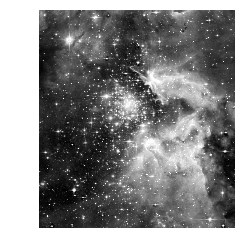

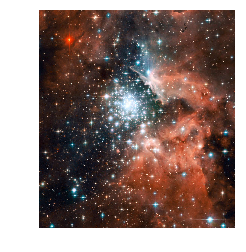

In [23]:
#3.5

image_color = plt.imread("hubble.jpg") / 255
image_color.shape
red_layer = image_color[:,:,0]
plt.imshow(red_layer, cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(image_color)
plt.axis("off")
plt.show()


(1158, 1041) 10
The difference of number of entries between the original and compressed images is : 
3550434


(66000, 3616434)

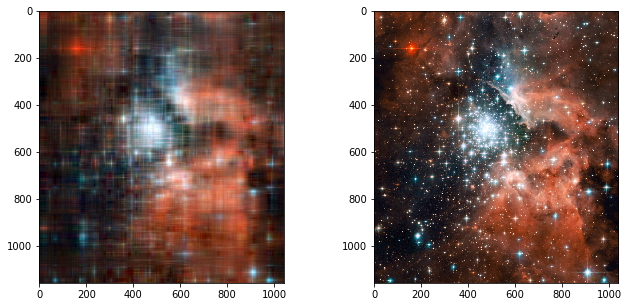

In [24]:
def image_comp(s):
    image_original = plt.imread("hubble.jpg")/255
   
    if len(image_original)== 2:
        U,sigma,VH = Trun_SVD(image_original,s1)
        
    else:
        r = image_original[:,:,0]
        print(r.shape,s)
        g = image_original[:,:,1]
        b = image_original[:,:,2]
        X0,X1,X2,nr_entries = Trun_SVD(r,s)
        Y0,Y1,Y2,ng_entries = Trun_SVD(g,s)
        Z0,Z1,Z2,nb_entries = Trun_SVD(b,s)
        
               
        
        Ar =  X0@X1@X2
        Ag =  Y0@Y1@Y2
        Ab =  Z0@Z1@Z2
        As = np.dstack((Ar,Ag,Ab))
        As = np.clip(As, 0, 1)
        B = As.astype(float)
        
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))
        axes[0].imshow(B)
        axes[1].imshow(image_original)
        
        n_compressed_entries = nr_entries+ng_entries+nb_entries
        
        print("The difference of number of entries between the original and compressed images is : ")
        print(image_original.size-n_compressed_entries )
        
        return n_compressed_entries ,image_original.size
        
image_comp(10)

### Exercise 4

In [26]:
#4.1

import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.linalg as la

def whether_Drazin(A,AD,k=1):
    # Condition 1
    
    cond1 = np.allclose(A@AD, AD@A)
    
    # Condition 2
    
    Ak = LA.matrix_power(A,k)
    
    cond2 = np.allclose(A@Ak@AD, Ak)
    
    # Condition 3
    
    cond3 = np.allclose(AD@A@AD, AD)
    
    cond = cond1 and cond2 and cond3
    return cond

A = np.array([[1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]])
AD = np.array([[1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]])
k=1
whether_Drazin(A,AD,k)

True

In [27]:
B = np.array([[1,1,3],[5,2,6],[-2,-1,-3]])
BD = np.array([[0,0,0],[0,0,0],[0,0,0]])
k=3
whether_Drazin(B,BD,k)

True

In [28]:
#4.2
def Drazin(A,tol=1e-8):
    m,n = A.shape
    f1 = lambda x: abs(x) > tol
    f2 = lambda x: abs(x) <= tol
    Q1,S,k1 = la.schur(A,sort = f1)
    Q2,T,k2 = la.schur(A,sort = f2)
    U = np.hstack((S[:,:k1],T[:,:n-k1]))
    U_inv = LA.inv(U)
    V = U_inv@A@U
    Z = np.zeros((n,n))
    if k1 !=0:
        M_inv = LA.inv(V[:k1,:k1])
        Z[:k1,:k1] = M_inv
        
    return U@Z@U_inv

A = np.array([[1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]])
AD = Drazin(A,1e-12) 
k=1
whether_Drazin(A,AD,k)

True

In [29]:
#4.3
def Resistance(A):
    m,n = A.shape
    if m != n:
        raise ValueError('A should be square matrix!')
    
    D = np.diag(A.sum(axis=1))
    L = D-A
    
    R = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            L_tilda = np.copy(L)
            
            L_tilda[j, :] = np.eye(n)[j]
            L_tilda = Drazin(L_tilda)
            if i != j:
                R[i, j] = L_tilda[i, i]            
    
    
    return R

A  = np.array([[0, 1, 0, 0], 
               [1, 0, 1, 0], 
               [0, 1, 0, 1], 
               [0, 0, 1, 0]])

Resistance(A)

array([[0., 1., 2., 3.],
       [1., 0., 1., 2.],
       [2., 1., 0., 1.],
       [3., 2., 1., 0.]])

In [31]:
#4.4
class LinkPredictor:
    """  Class to perform link prediction
    """
    def __init__(self, file):
        
        graph = pd.read_csv(file, header = None).as_matrix()
        m, n = graph.shape
        
        nodes, idx = np.unique(graph, return_inverse = True)
        self.nodes = nodes
        
        idx = idx.reshape((m, n))
        self.len = len(nodes)
        Adj = np.zeros((self.len, self.len))
        
        for i in range(m):
            Adj[idx[i, 0], idx[i, 1]] = 1
            Adj[idx[i, 1], idx[i, 0]] = 1
        self.Adj = Adj
        
        R = Resistance(Adj)
        self.R = R
        self.maxR = R.max()
        
    def predict_link(self, node = None):
    
        if node == None:
            Adj_cp = np.copy(self.Adj)
            R_cp = np.copy(self.R)
            newL = R_cp + self.maxR * Adj_cp + self.maxR * np.eye(self.len)
            idx_min = np.unravel_index(newL.argmin(), newL.shape)
            return (self.nodes[idx_min[0]], self.nodes[idx_min[1]])
        
        else: 
            if node in self.nodes:
                idx = np.where(self.nodes == node)[0][0]
                Adj_cp = np.copy(self.Adj)
                R_cp = np.copy(self.R)
                newL = R_cp + Adj_cp + np.eye(self.len)
                newL = newL[:,idx]
                idx_min = np.unravel_index(newL.argmin(), newL.shape)
                return self.nodes[idx_min[0]]
                
            else:
                raise ValueError("The node must be in the network.")
                
        
    def add_link(self, node1, node2):
    
        if node1 in self.nodes and node2 in self.nodes:
            idx1 = np.where(self.nodes == node1)[0][0]
            idx2 = np.where(self.nodes == node2)[0][0]
            
            self.Adj[idx1,idx2] = self.Adj[idx1,idx2] + 1
            self.Adj[idx2,idx1] = self.Adj[idx2,idx1] + 1
            self.R = Resistance(self.Adj)
        else:
            raise ValueError("node1 and node2 must be present in the network.")
            
social_ntw = LinkPredictor('social_network.csv')
social_ntw.predict_link()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


('Oliver', 'Emily')

In [32]:
social_ntw.predict_link('Melanie')

'Carol'

In [33]:
social_ntw.predict_link('Alan')

'Sonia'

In [34]:
social_ntw.add_link('Alan', 'Sonia')
social_ntw.predict_link('Alan')

'Piers'

In [36]:
social_ntw.add_link('Alan', 'Piers')
social_ntw.predict_link('Alan')

'Abigail'

### Exercise 5

In [1]:
#5.1

import numpy as np
import scipy.sparse

def create_adj(filename,N):
    adj =  scipy.sparse.dok_matrix((N,N))
    with open(filename, 'r') as myfile:
        for line in myfile:
            try:
                m,n =  line.strip().split()
                adj[int(m),int(n)] = 1
#                 print(adj[m,n])
            except:
                pass
    return adj

A = create_adj('matrix.txt', 8)
print(A)

  (0, 7)	1.0
  (1, 0)	1.0
  (3, 0)	1.0
  (3, 2)	1.0
  (3, 6)	1.0
  (4, 0)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
  (5, 0)	1.0
  (5, 6)	1.0
  (6, 0)	1.0
  (7, 0)	1.0


In [3]:
#5.2
import numpy as np
import scipy.linalg

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K    

A = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
K_givenA(A)



array([[0.        , 1.        , 0.125     , 0.33333333, 0.33333333,
        0.5       , 1.        , 1.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.33333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.33333333,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.33333333, 0.33333333,
        0.5       , 0.        , 0.        ],
       [1.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [4]:
#5.3

import numpy as np
import scipy.linalg

N = None
d = 0.85
tol = 1e-5
iter_max=100

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K  

def iterative(A,N,d,tol):
    n,n = np.shape(A)
    pt = np.random.random(n)
    ones = np.ones(n)
    K=K_givenA(A)
    iter = 0
    dist=5
    while (iter<iter_max)& (dist>tol):
        pt1 = d*np.asarray(np.matrix(K)@np.matrix(pt).T).reshape(-1) + ((1-d)/n)*ones
        dist = scipy.linalg.norm(pt1-pt)
        pt = pt1
        iter +=1
    return pt1

A  = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 
               1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
iterative(A,N,d,tol)

array([0.43869393, 0.02171029, 0.02786154, 0.02171029, 0.02171029,
       0.02786154, 0.04585394, 0.39460666])

In [5]:
#5.4

import numpy as np
import scipy.linalg

N= None
d=0.85
tole=1e-15
iter_max=100

def eigen(A,N):
    m,n = np.shape(A)
    x=[None]*(N+1)
    x[0]=np.random.random(n)
    x[0]=x[0]
    x[0]=x[0]/scipy.linalg.norm(x[0])
    for k in range(N):
        matrix=(np.matrix(A)@(np.matrix(x[k]).T)).T
        x[k+1]=np.asarray(matrix).reshape(-1)
        x[k+1]=x[k+1]/scipy.linalg.norm(x[k+1])
    eigenvalue=np.float((np.matrix(x[N]))@(np.matrix(A))@(np.matrix(x[N]).T))
    return eigenvalue,x[N]


def iterationmatrix(A,N,d,tol):
    n,n = np.shape(A)
    K = K_givenA(A)
    E = np.ones((n,n))
    B = d*K + ((1-d)/n)*E
    p = scipy.linalg.solve(np.eye(n) - d * K, ((1 - d) / n) * np.ones(n))
    return p

A  = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 
               1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
iterationmatrix(A,N,d,tol)

array([0.43869288, 0.02171029, 0.02786154, 0.02171029, 0.02171029,
       0.02786154, 0.04585394, 0.39459924])

In [6]:
#5.5
import numpy as np
import scipy.linalg
import pandas as pd

iter_max=100

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K  

def iterative(A,N,d,tol):
    n,n = np.shape(A)
    pt = np.random.random(n)
    ones = np.ones(n)
    K=K_givenA(A)
    iter = 0
    dist=5
    while (iter<iter_max)& (dist>tol):
        pt1 = d*np.asarray(np.matrix(K)@np.matrix(pt).T).reshape(-1) + ((1-d)/n)*ones
        dist = scipy.linalg.norm(pt1-pt)
        pt = pt1
        iter +=1
    return pt1


ncaa = pd.read_csv('ncaa2013.csv', header = 0).as_matrix()
m, n = ncaa.shape
teams, idx = np.unique(ncaa, return_inverse = True)
idx = idx.reshape((m, n))

t = len(teams)
Adj = np.zeros((t,t))

for i in range(m):
    Adj[idx[i, 1], idx[i, 0]] = 1

ranks = iterative(Adj,N=None, d = 0.7, tol =1e-5)
np.argsort(ranks.T)
ranks = teams[np.argsort(ranks.T)].T[::-1]

print('The top 5 ranked teams are, in order:')
for i in range(5):
    print(ranks[i][0])

The top 5 ranked teams are, in order:
D
B
L
I
I


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### Exercise 6

In [37]:
#6.1
import numpy as np
from numpy import linalg as LA
import scipy.linalg as la

import matplotlib.pyplot as plt
import sympy as sy
import random

def cond_n(A):
    U,sigma,Vh = LA.svd(A)
    if np.min(sigma) == 0:
        return np.inf
    else:
        return np.max(sigma) / np.min(sigma)
    
A =np.array([[1,2],[3,4]])
cond_number = cond_n(A)
cond_number_pack=LA.cond(A)
print('The difference is : ', cond_number-cond_number_pack)

The difference is :  0.0


In [38]:
#6.2

w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.

x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

# Perturb one of the coefficients very slightly.

h = np.zeros(21)
h[1]=1e-7
new_coeffs = w_coeffs - h
print(new_coeffs[:6])

# Use NumPy to compute the roots of the perturbed polynomial.
new_roots = np.roots(np.poly1d(new_coeffs))

# Sort the roots to ensure that they are in the same order.
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

# Estimate the absolute condition number in the infinity norm.
k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
print(k)

# Estimate the relative condition number in the infinity norm.
k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)

[1 -210 20615 -1256850 53327946 -1672280820]
[1 -210.000000100000 20615 -1256850 53327946 -1672280820]
28260604.34345689


1.95051296424887e+25

1.35848603339402e+27

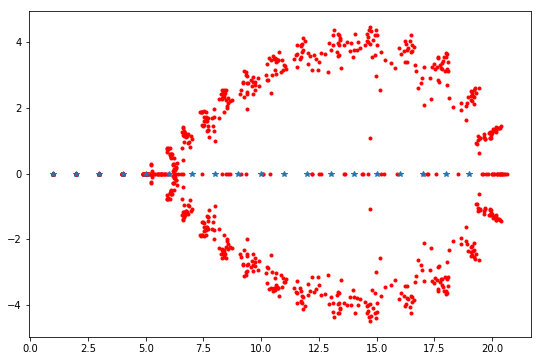

In [41]:
def Exercise2(n):
    
    w_roots = np.arange(1, n)
    
    x, i = sy.symbols('x i')
    
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, n-1)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    plt.figure(figsize=(9, 6))
    plt.plot(w_roots, np.zeros(n-1), '*', label='Original Solutions')
    
    h = np.zeros(n)+(1e-10) 
    
    for i in range(0,50):
        r = np.random.normal(size=n, loc=1,scale=(1e-10))

        new_coeffs = w_coeffs * r
        new_roots = np.roots(np.poly1d(new_coeffs))

        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)

        plt.scatter(new_roots.real, new_roots.imag, marker='.', c='r')
      
        k = LA.norm(new_roots - w_roots, np.inf) / LA.norm(h, np.inf)
        
        cond_n = k* LA.norm(w_coeffs,np.inf) / LA.norm(w_roots,np.inf)
        
    return cond_n

Exercise2(20)

In [40]:
#6.3
def eigen_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    
    lamda = LA.eigvals(A)
    lamda1 = LA.eigvals(H+A)
    cond_abs = LA.norm(lamda-lamda1)/LA.norm(H)
    cond_rela = (LA.norm(A)/LA.norm(lamda)) * cond_abs
    
    return cond_abs,cond_rela


eigen_cond(A)

(0.5352846585388282, 0.5444354865049605)

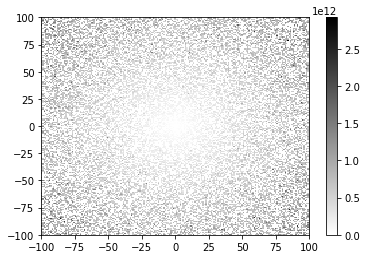

In [42]:
#6.4
def cond_plot(xmin, xmax, ymin, ymax, res):
    
    grid_x = np.linspace(xmin, xmax, res)
    grid_y = np.linspace(ymin, ymax, res)
    
    cond_rela = np.empty((res, res))
    
    x, y = np.meshgrid(grid_x, grid_y)
    
    for i, xi in enumerate(grid_x):
        for j, yi in enumerate(grid_y):
            A = np.array([[1,  xi], [yi, 1]])
            cond_rela[i, j] = eigen_cond(A)[1]
                                
    plt.pcolormesh(x, y, cond_rela, cmap='gray_r')
    plt.colorbar()
    
    plt.show()
    
cond_plot(-100, 100, -100, 100, 200)

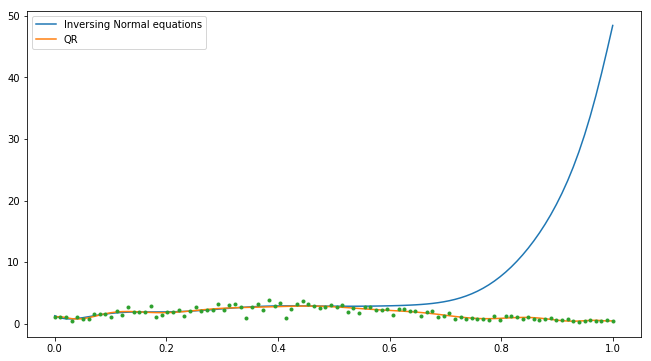

In [43]:
#6.5
def Least_SQ_stab(n):
    
    xk,yk = np.load('stability_data.npy').T
    A = np.vander(xk,n+1)
    
    x_hat = la.inv(A.T @ A) @ A.T @ yk
    inv_error = LA.norm(A @ x_hat - yk)
    
    Q1, R1 = la.qr(A,mode='economic')
    x_hat_qr = la.solve_triangular(R1,Q1.T@yk)
    qr_error = LA.norm(A@x_hat_qr - yk)
    
    plt.figure(figsize=(11, 6))
    plt.plot(xk, np.polyval(x_hat, xk), label='Inversing Normal equations')
    plt.plot(xk, np.polyval(x_hat_qr, xk), label='QR')
    plt.plot(xk, yk, '.')
    plt.legend()
    plt.show()
    
Least_SQ_stab(16)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


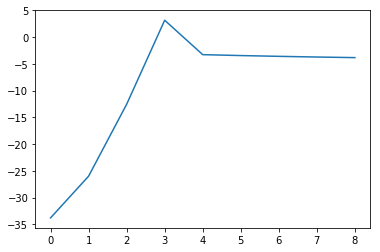

array([[2.06126324e-15],
       [5.03443411e-12],
       [3.45521445e-06],
       [2.30455449e+01],
       [3.70862144e-02],
       [3.12796739e-02],
       [2.70462894e-02],
       [2.38227287e-02],
       [2.12860391e-02],
       [0.00000000e+00]])

In [44]:
#6.6
from mpmath import e
def error_integration():
    
    x = sy.symbols('x')
    n = np.arange(5, 50, 5)
    
    errors = np.zeros((10,1))
    
    for i, n in enumerate(n):
        integral = (sy.integrate(x**n * sy.exp(x-1), (x, 0, 1)))
        In = (-1)**n * sy.subfactorial(n) + (-1)**(n+1) * sy.factorial(n) / e
        errors[i] = np.abs(integral - In)
        
    plt.plot(np.log(errors))
    plt.show()
    return errors

error_integration()